# Joe Stanley
### ECE522 - EXAM1

In [7]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import electricpy as ep
from electricpy.constants import *

# Set Boolean Control for Report Style
debug = True

## Problem I:
### Part A:
Given the parameters described below, find: $\text{slip}_{\text{rated}}$, $\omega_{r-\text{rated}}$, and $\Lambda_{dr_\text{rated}}$. Rated is defined to mean that the operating conditions are such that: $\left|V_{dqs}\right|=1.0\text{pu}$, $T_{em}=1.0\text{pu}$, and $\omega_{es}=1.0\text{pu}$

For this, we know:

$\\
V_{dqs}=r_sI_{dqs}+j\omega_{es}\left(L_sI_{dqs}+\frac{3}{2}L_{sr}I_{dqr}\right)\\
0=r_rI_{dqr}+j(\omega_{es}-\omega_r)\Lambda_{dqr}\\
\Lambda_{dqr}=\frac{3}{2}L_{sr}I_{dqs}+L_{r}I_{dqr}\\
T_{em}=\frac{3p}{4}\frac{\frac{3}{2}L_{sr}}{L_r}\operatorname{Im}\left(\overline{\Lambda_{dqr}}I_{dqs}\right)\\
$

Additionally, we will need to use a few additional equations to solve this system.

$\\
L_s=L_{LS}+L_m\\
L_r=L_{Lr}+L_m\\
L_{sr} = \frac{2}{3}\cdot(L_r - L_{Lr})\cdot a_t
$

As a final note, we will make the following assumptions:

$p=4\qquad a_t=2$

Using an iterative solver (shown in code below), we can now find the terms as:

{{P1_latex}}

#### Sub-Part 1:
From simple manipulation and calculation, we can find the desired results to equal:

- $\text{slip}_{\text{rated}}=${{s_rated}}
- $\omega_{r_\text{rated}}=${{w_rated}}
- $\Lambda_{\text{dr}_\text{rated}}=${{lamdr_rated}}

#### Sub-Part 2:
![I-A-2.png](I-A-2.png)

#### Sub-Part 3:
![I-A-3.png](I-A-3.png)

S: 0.03723 	W: 0.96277 	Lambda: 0.89766


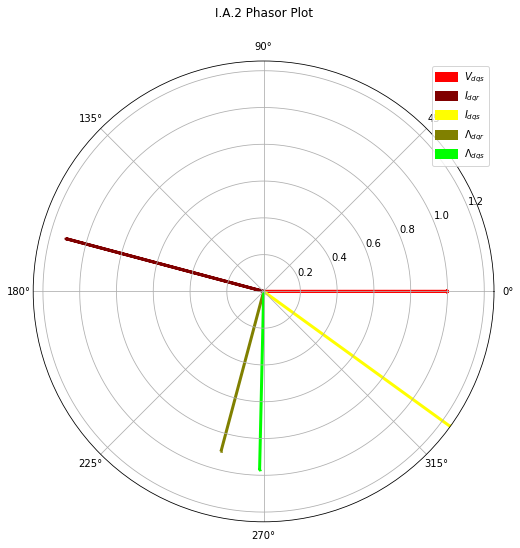

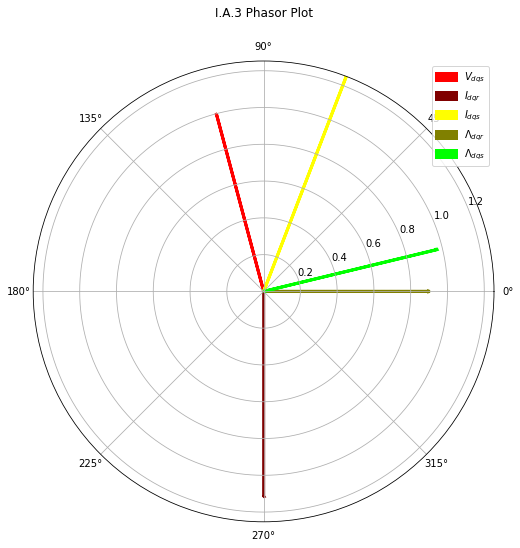

[['1.0 ∠ 104.923°']
 ['1.114 ∠ -90.0°']
 ['1.253 ∠ 69.008°']
 ['0.898 ∠ -0.0°']
 ['0.97 ∠ 13.62°']]


In [11]:
# Define Provided Machine Parameters
rs = 0.03 #pu
LLs = 0.1 #pu
Lm = 2.0 #pu
LLr = 0.1 #pu
rr = 0.03 #pu

# Define Rated Criteria
VdqsMag = 1
Tem = 1
wes = 1

# Calculate Additional Inductance Terms
Ls = LLs + Lm
Lr = LLr + Lm

# Define Equations Function as Solver
def equations(val):
    Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,wr = val
    A = (rs*Ids - wes*LAMqs) - VdqsMag
    B = rs*Iqs - wes*LAMds
    C = rr*Idr - (wes-wr)*LAMqr
    D = rr*Iqr + (wes-wr)*LAMdr
    E = (Ls*Ids + Lm*Idr) - LAMds
    F = (Ls*Iqs + Lm*Iqr) - LAMqs
    G = (Lm*Ids+Lr*Idr) - LAMdr
    H = (Lm*Iqs+Lr*Iqr) - LAMqr
    I = (Lm/Lr*(LAMdr*Iqs-LAMqr*Ids)) - Tem
    return(A,B,C,D,E,F,G,H,I)

######################################################################
# A.1)

# Define Initial Guesses
Idr0 = -1
Iqr0 = -1
Ids0 = 1
Iqs0 = 1
LAMdr0 = Lm*Ids0 + Lr*Idr0
LAMqr0 = Lm*Iqs0 + Lr*Iqr0
LAMds0 = Ls*Ids0 + Lm*Idr0
LAMqs0 = Ls*Iqs0 + Lm*Iqr0
wr = 1

# Use Iterative Solver to Find Results
Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,wr = fsolve(equations,(
    Idr0,Iqr0,Ids0,Iqs0,LAMdr0,LAMqr0,LAMds0,LAMqs0,wr))

# Define Complex Composition Function
def complexcomposer(Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,Vds,Vqs):
    # Return order: Vdqs, Idqr, Idqs, LAMdqr, LAMdqs
    return(np.array([
        Vds + 1j*Vqs,
        Idr + 1j*Iqr,
        Ids + 1j*Iqs,
        LAMdr+1j*LAMqr,
        LAMds+1j*LAMqs,
    ]))
Vds = VdqsMag
Vqs = 0
clist = complexcomposer(Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,Vds,Vqs)
LAMdqr = LAMdr+1j*LAMqr

# Generate into Latex Vector
vect_desc = (r"$$\begin{bmatrix}V_{\text{dqs}}\\I_{\text{dqr}}\\"+
            r"I_{\text{dqs}}\\\Lambda_{\text{dqr}}\\ \Lambda_{\text{dqr}}"+
            "\end{bmatrix}=")
P1_latex = vect_desc + ep.clatex(clist,predollar=False,double=True)

# Calculate Desired Terms
s_rated = round((wes-wr)/wes,5)
w_rated = round(wr,5)
lamdr_rated = round(abs(LAMdqr),5)

print("S:",s_rated,"\tW:",w_rated,"\tLambda:",lamdr_rated)

######################################################################
# A.2)
# Use Complex Values to Plot Phasor Diagram
labels = [
    "$V_{dqs}$",
    "$I_{dqr}$",
    "$I_{dqs}$",
    "$\\Lambda_{dqr}$",
    "$\\Lambda_{dqs}$",
]
ep.phasorplot(clist,"I.A.2 Phasor Plot",labels,filename="I-A-2",size=8,linewidth=3,plot=debug)

######################################################################
# A.3)
# Calculate Phase Shift
shift = np.angle(LAMdqr,deg=True)
# Shift Phasors by Phase Shift Specified
clist *= ep.phs(-shift)
# Use Complex Values to Plot Phasor Diagram
ep.phasorplot(clist,"I.A.3 Phasor Plot",labels,filename="I-A-3",size=8,linewidth=3,plot=debug)

ep.cprint(clist)

### Part B:

![I-B.png](I-B.png)

#### Sub-Part 1:
![I-B-1.png](I-B-1.png)

#### Sub-Part 2:
![I-B-2.png](I-B-2.png)

#### Sub-Part 3:
![I-B-3.png](I-B-3.png)

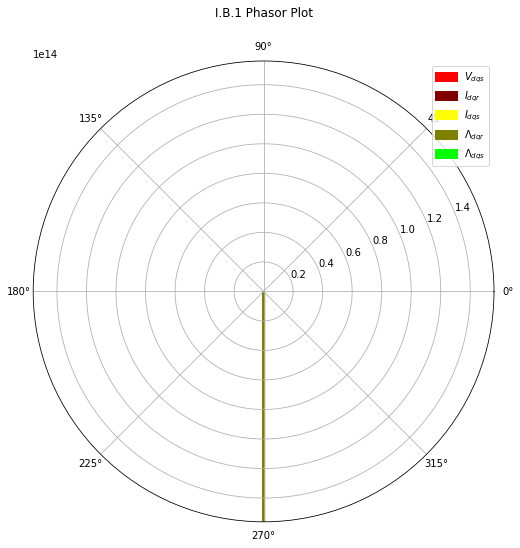

[['0.912 ∠ -94.16°']
 ['0.388 ∠ -80.518°']
 ['0.55 ∠ 46.654°']
 ['156089045728200.75 ∠ -90.0°']
 ['0.928 ∠ 4.828°']]


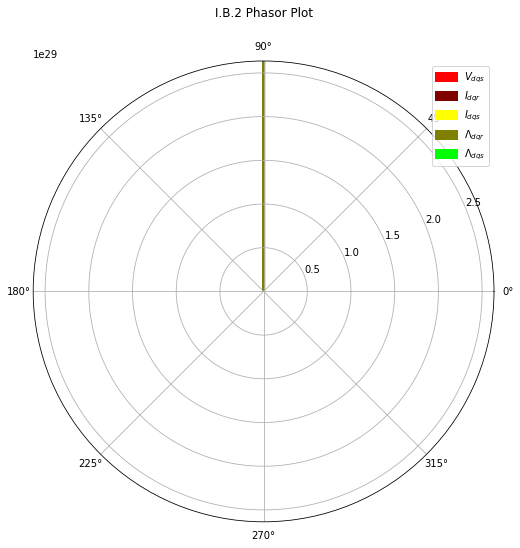

[['0.913 ∠ -94.072°']
 ['0.38 ∠ -75.116°']
 ['0.518 ∠ 48.038°']
 ['2.6361095678062905e+29 ∠ 90.0°']
 ['0.925 ∠ 4.665°']]


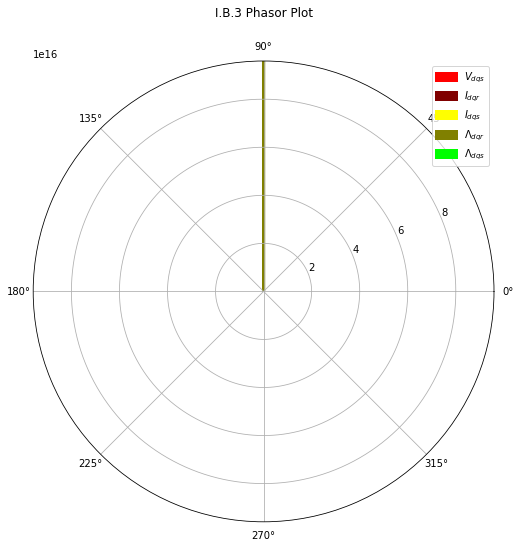

[['0.442 ∠ -95.847°']
 ['0.23 ∠ -65.795°']
 ['0.254 ∠ 61.009°']
 ['9.590110969497051e+16 ∠ 90.0°']
 ['0.449 ∠ 6.501°']]


In [17]:
# Re-Define Known Values
Tem = 0

# Define Equations Function as Solver
def equations_B(val,wr,LAMdr):
    Idr,Iqr,Ids,Iqs,LAMqr,LAMds,LAMqs,Vds,Vqs = val
    A = (rs*Ids - wes*LAMqs) - Vds
    B = (rs*Iqs - wes*LAMds) - Vqs
    C = rr*Idr
    D = rr*Iqr + (wes-wr)*LAMdr
    E = (Ls*Ids + Lm*Idr) - LAMds
    F = (Ls*Iqs + Lm*Iqr) - LAMqs
    G = (Lm*Ids+Lr*Idr) - LAMdr
    H = (Lm*Iqs+Lr*Iqr)
    I = (Lm/Lr*(LAMdr*Iqs-Ids)) - Tem
    return(A,B,C,D,E,F,G,H,I)

# Define Initial Guesses
Vds0 = 0
Vqs0 = 0
Idr0 = 0
Iqr0 = 0
Ids0 = 1
Iqs0 = 0
LAMqr0 = 0
LAMds0 = Ls*Ids0 + Lm*Idr0
LAMqs0 = Ls*Iqs0 + Lm*Iqr0

######################################################################
# B.1)
wr = 0.0
LAMdr = lamdr_rated
b1 = lambda x: equations_B(x,wr,LAMdr)

# Use Iterative Solver to Find Results
Idr,Iqr,Ids,Iqs,LAMqr,LAMds,LAMqs,Vds,Vqs = fsolve(b1,(
    Idr0,Iqr0,Ids0,Iqs0,LAMqr0,LAMds0,LAMqs0,Vds0,Vqs0))

# Generate Phasor Plot
clist = complexcomposer(Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,Vds,Vqs)
ep.phasorplot(clist,"I.B.1 Phasor Plot",labels,filename="I-B-1",size=8,linewidth=3,plot=debug)
ep.cprint(clist)

######################################################################
# B.2)
wr = w_rated
LAMdr = lamdr_rated
b2 = lambda x: equations_B(x,wr,LAMdr)

# Use Iterative Solver to Find Results
Idr,Iqr,Ids,Iqs,LAMqr,LAMds,LAMqs,Vds,Vqs = fsolve(b2,(
    Idr0,Iqr0,Ids0,Iqs0,LAMqr0,LAMds0,LAMqs0,Vds0,Vqs0))

# Generate Phasor Plot
clist = complexcomposer(Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,Vds,Vqs)
ep.phasorplot(clist,"I.B.2 Phasor Plot",labels,filename="I-B-2",size=8,linewidth=3,plot=debug)
ep.cprint(clist)


######################################################################
# B.3)
wr = 2*w_rated
LAMdr = lamdr_rated/2
b3 = lambda x: equations_B(x,wr,LAMdr)

# Use Iterative Solver to Find Results
Idr,Iqr,Ids,Iqs,LAMqr,LAMds,LAMqs,Vds,Vqs = fsolve(b3,(
    Idr0,Iqr0,Ids0,Iqs0,LAMqr0,LAMds0,LAMqs0,Vds0,Vqs0))

# Generate Phasor Plot
clist = complexcomposer(Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,Vds,Vqs)
ep.phasorplot(clist,"I.B.3 Phasor Plot",labels,filename="I-B-3",size=8,linewidth=3,plot=debug)
ep.cprint(clist)


### Part C:

![I-C.png](I-C.png)


#### Sub-Part 1:
![I-C-1.png](I-C-1.png)

#### Sub-Part 2:
![I-C-2.png](I-C-2.png)

#### Sub-Part 3:
![I-C-3.png](I-C-3.png)

In [4]:
# Define Equations Function as Solver
def equations_C(val,wr,LAMdr,Tem):
    Idr,Iqr,Ids,Iqs,LAMqr,LAMds,LAMqs,Vds,Vqs = val
    A = (rs*Ids - wes*LAMqs) - Vds
    B = (rs*Iqs - wes*LAMds) - Vqs
    C = rr*Idr - (wes-wr)*LAMqr
    D = rr*Iqr + (wes-wr)*LAMdr
    E = (Ls*Ids + 3/2*Lsr*Idr) - LAMds
    F = (Ls*Iqs + 3/2*Lsr*Iqr) - LAMqs
    G = (3/2*Lsr*Ids+Lr*Idr) - LAMdr
    H = (3/2*Lsr*Iqs+Lr*Iqr) - LAMqr
    I = (3*p/4*(3/2*Lsr)/Lr*(LAMdr*Iqs-LAMqr*Ids)) - Tem
    return(A,B,C,D,E,F,G,H,I)

# Define Initial Guesses
Vds0 = 1
Vqs0 = 0
Idr0 = -1
Iqr0 = -1
Ids0 = 1
Iqs0 = -1
LAMqr0 = 3/2*Lsr*Iqs0 + Lr*Iqr0
LAMds0 = Ls*Ids0 + 3/2*Lsr*Idr0
LAMqs0 = Ls*Iqs0 + 3/2*Lsr*Iqr0

######################################################################
# C.1)
Tem = 1.0
wr = 0.0
LAMdr = lamdr_rated
c = lambda x: equations_C(x,wr,LAMdr,Tem)

# Use Iterative Solver to Find Results
Idr,Iqr,Ids,Iqs,LAMqr,LAMds,LAMqs,Vds,Vqs = fsolve(c,(
    Idr0,Iqr0,Ids0,Iqs0,LAMqr0,LAMds0,LAMqs0,Vds0,Vqs0))

# Generate Phasor Plot
clist = complexcomposer(Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,Vds,Vqs)
ep.phasorplot(clist,"I.C.1 Phasor Plot",labels,filename="I-C-1",size=8,linewidth=3,plot=debug)

######################################################################
# C.2)
Tem = 1.0
wr = w_rated
LAMdr = lamdr_rated
c = lambda x: equations_C(x,wr,LAMdr,Tem)

# Use Iterative Solver to Find Results
Idr,Iqr,Ids,Iqs,LAMqr,LAMds,LAMqs,Vds,Vqs = fsolve(c,(
    Idr0,Iqr0,Ids0,Iqs0,LAMqr0,LAMds0,LAMqs0,Vds0,Vqs0))

# Generate Phasor Plot
clist = complexcomposer(Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,Vds,Vqs)
ep.phasorplot(clist,"I.C.2 Phasor Plot",labels,filename="I-C-2",size=8,linewidth=3,plot=debug)

######################################################################
# C.3)
Tem = 0.5
wr = 2*w_rated
LAMdr = lamdr_rated/2
c = lambda x: equations_C(x,wr,LAMdr,Tem)

# Use Iterative Solver to Find Results
Idr,Iqr,Ids,Iqs,LAMqr,LAMds,LAMqs,Vds,Vqs = fsolve(c,(
    Idr0,Iqr0,Ids0,Iqs0,LAMqr0,LAMds0,LAMqs0,Vds0,Vqs0))

# Generate Phasor Plot
clist = complexcomposer(Idr,Iqr,Ids,Iqs,LAMdr,LAMqr,LAMds,LAMqs,Vds,Vqs)
ep.phasorplot(clist,"I.C.3 Phasor Plot",labels,filename="I-C-3",size=8,linewidth=3,plot=debug)